In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import the Wellbeing_and_lifestyle_data_Kaggle.csv file as a DataFrame
df = pd.read_csv("..//Project_One/Wellbeing_and_lifestyle_data_Kaggle.csv")
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [3]:
#(10)Coreleation between SLEEP_HOURS, LOST_VACATION, and ACHIEVEMENT
df1 = df[['SLEEP_HOURS','LOST_VACATION','ACHIEVEMENT']]
df1

,SLEEP_HOURS,LOST_VACATION,ACHIEVEMENT
0,7,5,2
1,8,2,5
2,8,10,3
3,5,7,2
4,7,0,2
...,...,...,...
15967,7,0,0
15968,6,0,6
15969,7,0,6
15970,8,7,3


<Axes: title={'center': 'Sum of Achievement Level and Lost of Vacation'}, xlabel='SLEEP_HOURS'>

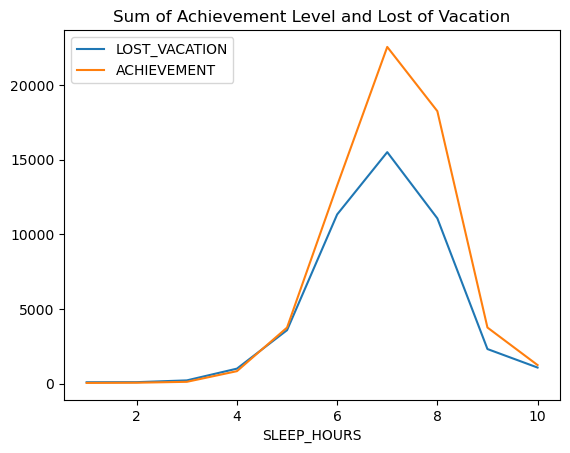

In [36]:
df1_sum = df1.groupby(['SLEEP_HOURS']).sum().plot()
df1_sum.set_title('Sum of Achievement Level and Lost of Vacation')
df1_sum

<Axes: title={'center': 'Mean of Achievement Level and Lost of Vacation'}, xlabel='SLEEP_HOURS'>

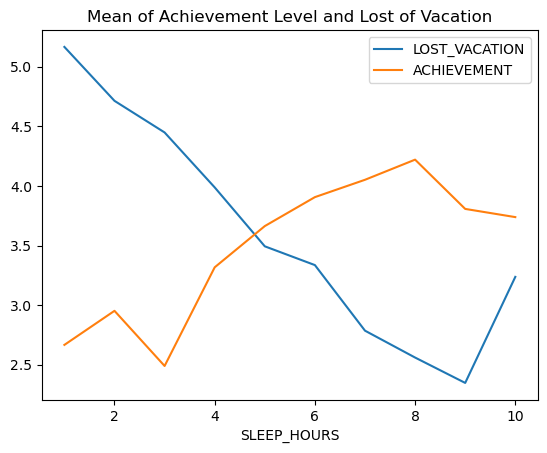

In [35]:
df1_mean = df1.groupby(['SLEEP_HOURS']).mean().plot()
df1_mean.set_title('Mean of Achievement Level and Lost of Vacation')
df1_mean

In [5]:
#2 - CORE_CIRCLE, TIME_FOR_PASSION, and ACHIEVEMENT
df2 = df[['CORE_CIRCLE','TIME_FOR_PASSION','ACHIEVEMENT']]
df2

,CORE_CIRCLE,TIME_FOR_PASSION,ACHIEVEMENT
0,5,0,2
1,3,2,5
2,4,8,3
3,3,2,2
4,3,1,2
...,...,...,...
15967,4,2,0
15968,8,5,6
15969,10,1,6
15970,8,6,3


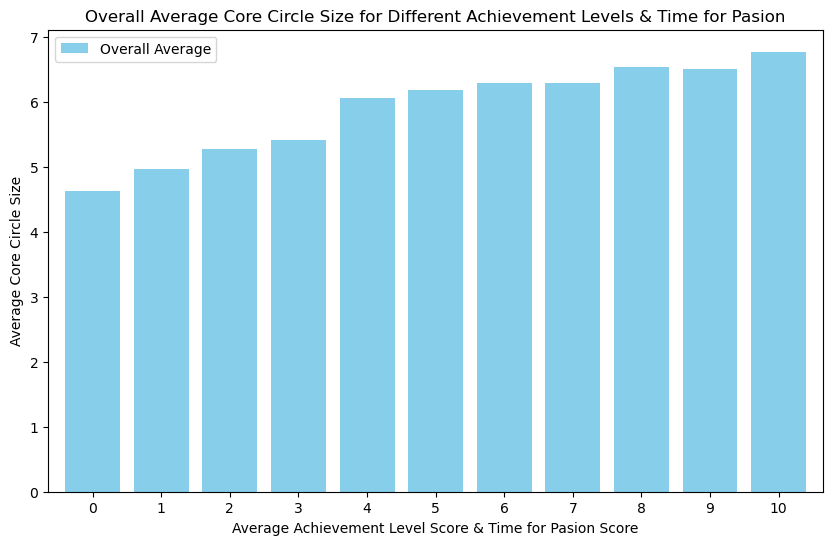

In [6]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group data by achievement level and time for passion, then calculate mean core circle size
grouped_data = df2.groupby(['ACHIEVEMENT', 'TIME_FOR_PASSION'])['CORE_CIRCLE'].mean().unstack()

# Calculate the overall mean core circle size for each unique combination
overall_mean = grouped_data.mean(axis=1)

# Plot a single bar for each achievement level, representing the overall average core circle size
overall_mean.plot(kind='bar', ax=ax, color='skyblue', width=0.8, label='Overall Average')

# Labeling axes and adding a title
ax.set_xlabel('Average Achievement Level Score & Time for Pasion Score')
ax.set_ylabel('Average Core Circle Size')
ax.set_title('Overall Average Core Circle Size for Different Achievement Levels & Time for Pasion')

# Rotate x-axis labels horizontal
plt.xticks(rotation='horizontal')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [9]:
#8 - PLACES_VISITED, SUFFICIENT_INCOME
df3 = df[['PLACES_VISITED','SUFFICIENT_INCOME']]

In [15]:
df3['SUFFICIENT_INCOME_MULTIPLIED'] = df3['SUFFICIENT_INCOME'] * 2
# Drop the original 'DONATION' column
df3 = df3.drop('SUFFICIENT_INCOME', axis=1)

# Rename 'DONATION_MULTIPLIED' to 'DONATION'
df3 = df3.rename(columns={'SUFFICIENT_INCOME_MULTIPLIED': 'SUFFICIENT_INCOME'})

df3

,PLACES_VISITED,SUFFICIENT_INCOME
0,2,4
1,4,8
2,3,8
3,10,4
4,3,8
...,...,...
15967,0,4
15968,6,8
15969,0,8
15970,10,8


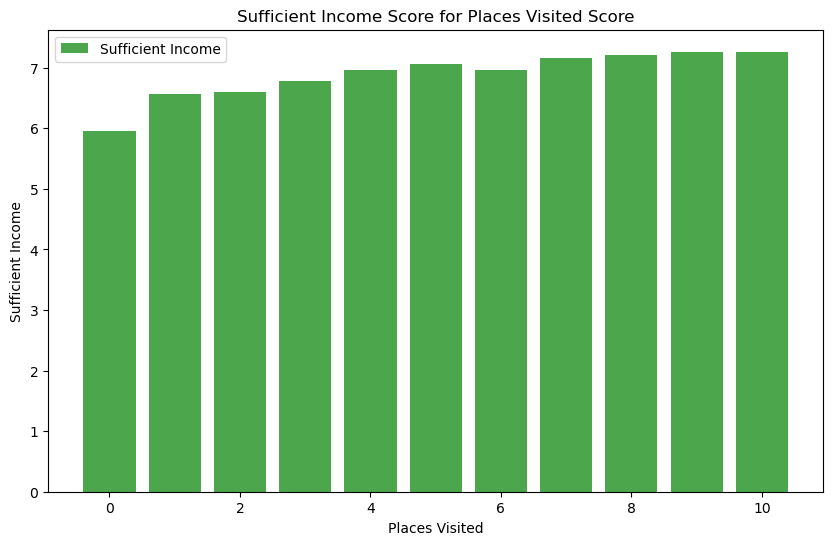

In [16]:
# Group data by 'PLACES_VISITED' and calculate mean 'DONATION' for each group
grouped_data = df3.groupby('PLACES_VISITED')['SUFFICIENT_INCOME'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data, color='green', alpha=0.7, label='Sufficient Income')

# Labeling axes and adding a title
plt.xlabel('Places Visited')
plt.ylabel('Sufficient Income')
plt.title('Sufficient Income Score for Places Visited Score')

# Add legend
plt.legend()

# Show the plot
plt.show()